In [3]:
import pandas as pd
import folium


In [ ]:
df = pd.read_csv('scraped_addresses.csv')
df.head()



,Address,Function,Size,Latitude,Longitude,Category,Name
0,Sarphatistraat 4,Kantoorfunctie,NaN,52.359783,4.902103,office,NaN
1,Sarphatistraat 6,Kantoorfunctie,NaN,52.359801,4.902221,office,NaN
2,Sarphatistraat 8,Bijeenkomstfunctie,NaN,52.359820,4.902338,public_place,NaN
3,Sarphatistraat 12,Gezondheidszorgfunctie,NaN,52.359856,4.902558,orthodontist,NaN
4,Sarphatistraat 14,Kantoorfunctie,NaN,52.359856,4.902558,office,NaN


In [88]:
df['Size'].value_counts()

Size
nan     1026
68       210
60       184
70       181
55       169
        ... 
360        1
283        1
249        1
236        1
1887       1
Name: count, Length: 333, dtype: int64

<Axes: >

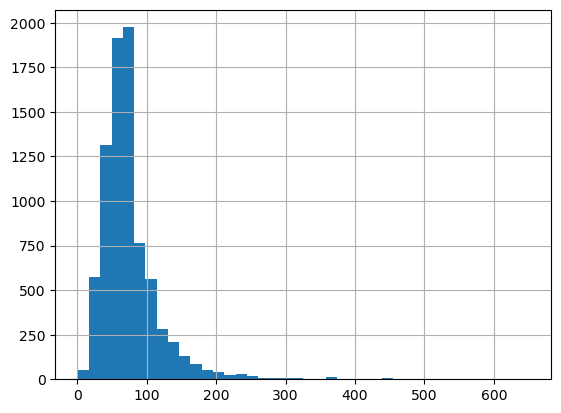

In [94]:
len(df)
df['Size'].value_counts()
df['Size'] = df['Size'].apply(lambda x: str(x))

# turn any size that is not a number into nan
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
# remove outliers
df = df[df['Size'] < 700]
# plot histogram
df['Size'] = df['Size'].apply(lambda x: float(x))
df['Size'].hist(bins=40)



In [77]:
coord1 = [4.9019831572786075, 52.36909393107095]  # Example coordinates for the bottom-left corner of the box
coord2 = [4.923407757440799, 52.35987518796452]  # Example coordinates for the top-right corner of the box

sample = df.sample(100)
# Create a map centered around the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Add points to the map
for idx, row in sample.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Address']).add_to(m)

# Add a rectangle (box) to the map
folium.Rectangle(bounds=[coord1, coord2], color='black', fill=True, fill_color='blue', fill_opacity=0.2).add_to(m)

# Display the map
m

